In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

from machine_learning.linear_regression import LinearRegression

# Linear Regression

Quick notebook testing out the Linear Regression class that I've built.

First step is to make a regression dataset. We'll use the `make_regression` class from `scikit-learn` for this. We'll also keep a random state in to make sure we're generating the same data each run of this notebook.

In [2]:
x, y = make_regression(n_samples=1000, n_features=10, random_state=42)

Initialise the class and then fit the model. We'll use a learning rate of `0.01` and the number of iterations of gradient descent at 1000.

In [3]:
lr = LinearRegression(learning_rate=0.01, num_iterations=1000)

In [4]:
lr.fit(x, y)

The `LinearRegression` class stores all the costs for each iteration of gradient descent. We can plot this against the number of epochs to make sure we are indeed minimizing the loss function.

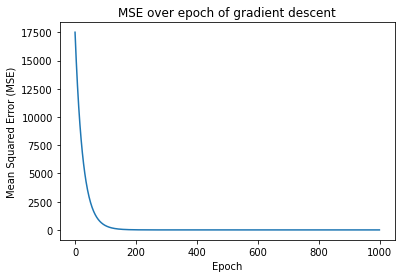

In [5]:
fig, ax = plt.subplots()

epochs = range(len(lr.costs))

ax.plot(epochs, lr.costs)
ax.set(
    title='MSE over epoch of gradient descent',
    ylabel='Mean Squared Error (MSE)',
    xlabel='Epoch'
)

plt.show()

Nice. We can also check our solution's coefficients and predictions against `sklearn`'s. 

In [6]:
from sklearn.linear_model import LinearRegression as LinearRegressionSKLEARN

In [7]:
lr2 = LinearRegressionSKLEARN(n_jobs=1000)
lr2.fit(x, y)
lr2.coef_

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

In [8]:
lr.W

array([32.12551599, 76.33080479, 33.69268666,  9.427599  ,  5.1662172 ,
       58.28693611, 29.434816  ,  7.18075546, 10.30191972, 75.31996971])

In [9]:
sklearn_predictions = lr2.predict(x)
own_predictions = lr.predict(x)

In [10]:
error = abs(sklearn_predictions - own_predictions)
error.mean()

2.8671528811823886e-06

In [11]:
# normalize this against the scale of the data we're using
error.mean() / y.mean()

8.699843180772083e-07

That's an acceptable level of difference for me.